## 回家作業
有兩份資料：

- 使用者瀏覽資料
https://raw.githubusercontent.com/ywchiu/rcookbook/master/chapter6/purchase_view.tab

- 使用者購物資料
https://raw.githubusercontent.com/ywchiu/rcookbook/master/chapter6/purchase_order.tab

### 問題

- 問題一:  請使用 pandas 將 purchase_view 的資料讀入到 purchase_view 的變數之中
- 問題二:  請使用 pandas 將 purchase_order 的資料讀入到 purchase_order 的變數之中
- 問題三:  請將purchase_order 與purchase_view 的Time 欄位轉換為時間格式
- 問題四:  請統計在purchase_view 下，單一使用者瀏覽單一商品的次數(view_cnt)，並將統計結果包含:User, Product, view_cnt 存入一名為view_df 的變數中
- 問題四:  請統計在purchase_order 下，單一使用者購買單一商品的數量總和(purchase_sum)，並將統計結果包含:User, Product, buy_cnt 存入一名為purchase_df 的變數中
- 問題五： 請將 view_df 與 purchase_df 根據 user, product 兩欄位合併成一名為all_df 的DataFrame中
- 問題六： 請將 all_df 存入 all_df.csv 中


### 答案一

In [3]:
import pandas
purchase_view = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/rcookbook/master/chapter6/purchase_view.tab', sep = '\t')

In [4]:
purchase_view.head()

,Time,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593
3,2015-07-01 00:00:05,view,U393805241,P0005541535
4,2015-07-01 00:00:10,view,U10004621134,P0022135540


In [5]:
purchase_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Time       1191486 non-null object
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: object(4)
memory usage: 36.4+ MB


### 答案二

In [8]:
import pandas
purchase_order = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/rcookbook/master/chapter6/purchase_order.tab', sep = '\t')

In [9]:
purchase_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Time        54772 non-null object
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 2.5+ MB


### 答案三

In [10]:
purchase_order = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/rcookbook/master/chapter6/purchase_order.tab', sep = '\t', parse_dates=['Time'])

In [11]:
purchase_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54772 entries, 0 to 54771
Data columns (total 6 columns):
Time        54772 non-null datetime64[ns]
Action      54772 non-null object
User        54772 non-null object
Product     54772 non-null object
Quantity    54772 non-null int64
Price       54721 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [14]:
purchase_view['Time'] = pandas.to_datetime(purchase_view['Time'], format= '%Y-%m-%d %H:%M:%S')
purchase_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191486 entries, 0 to 1191485
Data columns (total 4 columns):
Time       1191486 non-null datetime64[ns]
Action     1191486 non-null object
User       1191486 non-null object
Product    1191486 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 36.4+ MB


### 答案四

In [15]:
purchase_view.head(3)

,Time,Action,User,Product
0,2015-07-01 00:00:01,view,U129297265,P0023468384
1,2015-07-01 00:00:03,view,U321001337,P0018926456
2,2015-07-01 00:00:05,view,U10070718237,P0000063593


In [21]:
#purchase_view.isna().sum()

In [18]:
view_df  = purchase_view.groupby(['User', 'Product'])['Action'].count().to_frame()

In [19]:
view_df.head()

Action
User         Product            
None          PNone            1
U10000000225 P0007107111       1
             P0007107122       1
             P0007107413       1
             P0009440001       1

### 答案五

In [22]:
purchase_df  = purchase_order.groupby(['User', 'Product'])['Action'].count().to_frame()

In [23]:
purchase_df.head()

Action
User         Product               
U1000001354  P0014520085          1
U10000044910 P0018800250          1
U10000056953 P0003926850034       1
             P0013344760004       2
             P0013834251          1

### 答案六

In [30]:
all_df = pandas.merge(view_df, purchase_df, left_index=True, right_index=True)

In [31]:
all_df.head()

Action_x  Action_y
User         Product                        
U10000044910 P0018800250         2         1
U10000056953 P0013834251         7         1
U10000065461 P0023597022         1         1
U10000092625 P0023729451        14         1
             P0024236730         4         1

In [32]:
all_df.columns

Index(['Action_x', 'Action_y'], dtype='object')

In [33]:
all_df.columns = ['view_cnt', 'buy_cnt']

In [34]:
all_df.head(3)

,,view_cnt,buy_cnt
User,Product,,
U10000044910,P0018800250,2,1
U10000056953,P0013834251,7,1
U10000065461,P0023597022,1,1


### 答案六

In [35]:
all_df.to_csv('all_df.csv')

### 分析

In [38]:
purchase_view['date'] = purchase_view['Time'].dt.date

In [41]:
stat = purchase_view.groupby('date')['date'].count()

Populating the interactive namespace from numpy and matplotlib


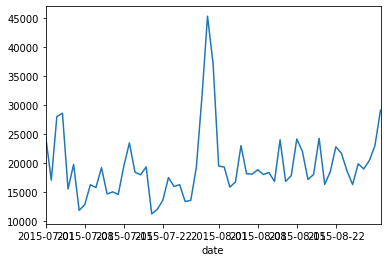

In [42]:
%pylab inline
stat.plot(kind = 'line')

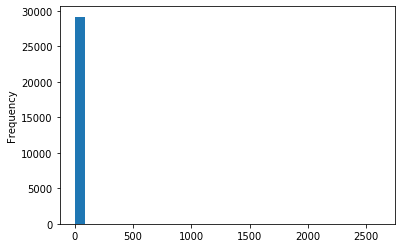

In [45]:
all_df['view_cnt'].plot(kind = 'hist', bins = 30)

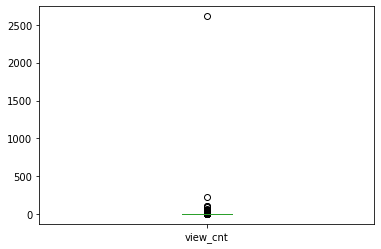

In [47]:
all_df['view_cnt'].plot(kind = 'box')

In [48]:
all_df['view_cnt'].describe()

count    29191.000000
mean         2.734541
std         15.616757
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       2613.000000
Name: view_cnt, dtype: float64

## 資料庫

In [49]:
import sqlite3 as lite
conn = lite.connect('test.sqlite')
cur  = conn.cursor()
cur.execute('SELECT SQLITE_VERSION();')
data = cur.fetchone()
print(data)
conn.close()

('3.24.0',)


In [50]:
import sqlite3 as lite
with lite.connect('test.sqlite') as conn:
    cur  = conn.cursor()
    cur.execute('SELECT SQLITE_VERSION();')
    data = cur.fetchone()
    print(data)

('3.24.0',)


In [51]:
import sqlite3 as lite 
with lite.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("DROP TABLE IF EXISTS PhoneAddress") 
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    cur.execute("SELECT phone,address FROM PhoneAddress") 
    data = cur.fetchall() 
    for rec in data: 
        print(rec[0], rec[1])


0912173381 United State
0928375018 Tokyo Japan
0957209108 Taipei


In [52]:
import sqlite3 as lite 
with lite.connect("test.sqlite") as con: 
    cur = con.cursor() 
    cur.execute("DROP TABLE IF EXISTS PhoneAddress") 
    cur.execute("CREATE TABLE PhoneAddress(phone CHAR(10) PRIMARY KEY, address TEXT, name TEXT unique, age INT NOT NULL)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0912173381','United State','Jhon Doe',53)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0928375018','Tokyo Japan','MuMu Cat',6)") 
    cur.execute("INSERT INTO PhoneAddress VALUES('0957209108','Taipei','Richard',29)") 
    cur.execute("SELECT phone,address FROM PhoneAddress") 
    data = cur.fetchone()
    print(data)
    data = cur.fetchall()
    print(data)
    


('0912173381', 'United State')
[('0928375018', 'Tokyo Japan'), ('0957209108', 'Taipei')]


In [54]:
import sqlite3 as lite
import pandas
employee = [{'name':'Mary', 'age':23 , 'gender': 'F'},{'name':'John', 'age':33 , 'gender': 'M'}]
df = pandas.DataFrame(employee)
df

,age,gender,name
0,23,F,Mary
1,33,M,John


In [55]:
with lite.connect('test.sqlite') as db:
    df.to_sql('employee', con = db, if_exists='replace')

In [56]:
with lite.connect('test.sqlite') as db:
    df2 = pandas.read_sql_query('select * from employee;', con = db)

In [57]:
df2

,index,age,gender,name
0,0,23,F,Mary
1,1,33,M,John


## 儲存實例

In [85]:
import pandas as pd
link = 'https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample2.csv'
df = pd.read_csv(link, index_col=0)
df.head()

,detail_url,search_date,title,address,floor_info,price,layout,building_area,building_use,latitude,longitude
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),高雄市湖內區民生街,3F/3F,"4,500元/月",NaN,6.0,透天厝/獨立套房,22.878436,120.250810
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,新北市蘆洲區長安街,4F/5F,"7,500元/月",NaN,10.0,透天厝/獨立套房,25.081558,121.461868
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,新北市永和區中山路一段,8F/12F,"11,000元/月",NaN,8.0,電梯大樓/分租套房,25.010293,121.511328
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,屏東縣潮州鎮六合路,3F/3F,"5,000元/月",NaN,8.0,透天厝/獨立套房,22.551346,120.538032
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,桃園市觀音區四維路,4F/5F,"5,000元/月",NaN,7.0,透天厝/分租套房,25.043652,121.141518


### 清理資料

In [86]:
df['search_date'] = pandas.to_datetime(df['search_date'], format = '%Y-%m-%d')

In [87]:
df[['city', 'area', 'road']] = df['address'].str.extract('(.+[市縣])(.+[區鎮鄉市])(.+[村街路])')

In [88]:
df[['floor', 'total_floor']] = df['floor_info'].str.extract('(\d+)F/(\d+)F')

In [89]:
df['price'] = df['price'].map(lambda e: int(e.replace('元/月', '').replace(',', '')))

In [90]:
df[['btype', 'buse']] = df['building_use'].str.extract('(.+?)/(.+)')

In [91]:
df.drop(['address', 'building_use', 'layout', 'floor_info'], axis = 1, inplace=True)

In [92]:
df.head()

,detail_url,search_date,title,price,building_area,latitude,longitude,city,area,road,floor,total_floor,btype,buse
0,https://rent.591.com.tw/rent-detail-1050934.html,2017-05-14,套房出租-近東方學院(六~八月可入住),4500,6.0,22.878436,120.250810,高雄市,湖內區,民生街,3,3,透天厝,獨立套房
1,https://rent.591.com.tw/rent-detail-1008046.html,2017-05-14,好房子【聰明的你、妳快來租吧】,7500,10.0,25.081558,121.461868,新北市,蘆洲區,長安街,4,5,透天厝,獨立套房
2,https://rent.591.com.tw/rent-detail-1586266.html,2017-05-12,陽台大套房(獨立洗衣機)近頂溪捷運站,11000,8.0,25.010293,121.511328,新北市,永和區,中山路,8,12,電梯大樓,分租套房
3,https://rent.591.com.tw/rent-detail-1699948.html,2017-05-13,火車站附近~~優質套房,5000,8.0,22.551346,120.538032,屏東縣,潮州鎮,六合路,3,3,透天厝,獨立套房
4,https://rent.591.com.tw/rent-detail-1404725.html,2017-05-12,觀音四維路優質陽台套房,5000,7.0,25.043652,121.141518,桃園市,觀音區,四維路,4,5,透天厝,分租套房


### 儲存資料

In [93]:
with lite.connect('house.sqlite') as db:
    df.to_sql('rent_591', con = db, if_exists='replace')

### 存取資料

In [94]:
with lite.connect('house.sqlite') as db:
    df2 = pandas.read_sql_query('select * from rent_591 limit 3;', con = db)

In [95]:
with lite.connect('house.sqlite') as db:
    df2 = pandas.read_sql_query('select city, avg(price/ building_area) from rent_591 group by city order by avg(price/ building_area) desc;', con = db)

In [80]:
with lite.connect('house.sqlite') as db:
    df2 = pandas.read_sql_query('select count(1) from rent_591', con = db)

In [97]:
df2

,city,avg(price/ building_area)
0,台北市,1874.699532
1,新北市,1153.721784
2,澎湖縣,1151.201633
3,None,893.245060
4,新竹市,843.920262
5,台中市,840.623624
6,基隆市,827.177361
7,台東縣,782.132233
8,高雄市,779.535660
9,金門縣,754.992031


## 敘述性統計

### 下載股價資料

In [99]:
! pip install pandas_datareader

You are using pip version 9.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [103]:
from pandas_datareader import DataReader
tw2330 = DataReader('2330.TW', data_source = 'yahoo', start = '2000-01-01')

In [104]:
tw2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,37.966480
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,38.819641
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,37.966480
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,36.899971
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,38.179729


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


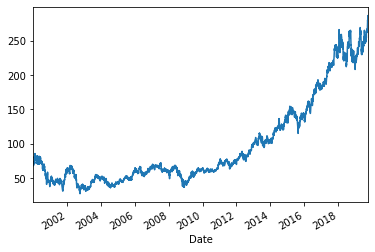

In [105]:
%pylab inline
tw2330['Close'].plot(kind = 'line')

In [106]:
tw2330.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,37.966480
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,38.819641
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,37.966480


In [107]:
tw2330.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4872 entries, 2000-01-04 to 2019-10-09
Data columns (total 6 columns):
High         4872 non-null float64
Low          4872 non-null float64
Open         4872 non-null float64
Close        4872 non-null float64
Volume       4872 non-null float64
Adj Close    4872 non-null float64
dtypes: float64(6)
memory usage: 266.4 KB


In [108]:
tw2330.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [109]:
tw2330['Close'].min()

27.45840072631836

In [110]:
tw2330['Close'].max()

286.5

In [111]:
len(tw2330)

4872

In [112]:
tw2330['Close'].count()

4872

In [113]:
tw2330.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-04,69.649002,68.475197,69.649002,69.649002,2.006623e+11,37.966480
2000-01-05,71.214104,68.866302,69.649002,71.214104,4.024668e+11,38.819641
2000-01-06,71.214104,69.649002,70.822899,69.649002,1.975457e+11,37.966480
2000-01-07,68.475197,66.518600,67.301300,67.692497,2.352703e+11,36.899971
2000-01-10,70.431396,68.475197,69.649002,70.040199,2.761717e+11,38.179729


In [114]:
tw2330.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-10-03,277.5,274.0,274.0,276.5,31890864.0,276.5
2019-10-04,280.0,275.0,279.5,276.5,35169613.0,276.5
2019-10-07,279.5,277.5,279.0,278.0,17510230.0,278.0
2019-10-08,286.5,282.5,283.5,286.5,35278551.0,286.5
2019-10-09,286.0,282.0,283.5,282.0,34551000.0,282.0


In [117]:
grades = [20,20,40,50,60,70,100]
g = pandas.Series(grades)

In [120]:
g.sum() / len(grades)

51.42857142857143

In [121]:
g.mean()

51.42857142857143

In [122]:
grades.sort()

In [123]:
grades

[20, 20, 40, 50, 60, 70, 100]

In [125]:
g.median()

50.0

In [127]:
g.value_counts()

20     2
70     1
60     1
50     1
100    1
40     1
dtype: int64

In [128]:
grades = [20,20,40,50,60,70,100]
g = pandas.Series(grades)

In [129]:
g.quantile(0.25)

30.0

In [130]:
g.quantile(0.75)

65.0

In [131]:
g.quantile(0.75) - g.quantile(0.25)

35.0

In [132]:
g.describe()

count      7.000000
mean      51.428571
std       28.535692
min       20.000000
25%       30.000000
50%       50.000000
75%       65.000000
max      100.000000
dtype: float64

Populating the interactive namespace from numpy and matplotlib


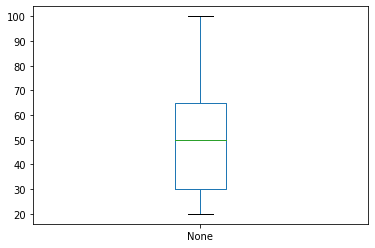

In [133]:
%pylab inline
g.plot(kind = 'box')

In [136]:
import numpy as np
temp = np.random.randint(1,30 ,100).tolist()

In [138]:
temp.append(999)
temp.append(999)
temp.append(999)

In [139]:
import pandas
t = pandas.Series(temp)

In [140]:
t.mean()

44.70873786407767

In [141]:
t.median()

18.0

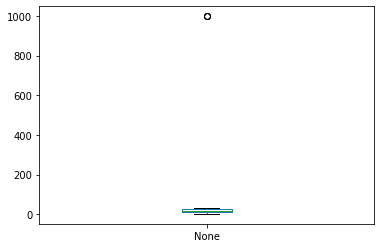

In [142]:
t.plot(kind = 'box')

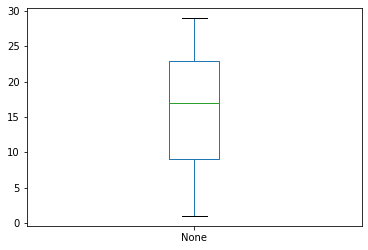

In [144]:
t[t<50].plot(kind = 'box')

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


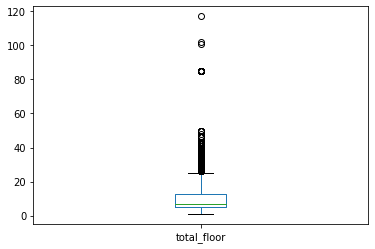

In [152]:
house = df[df['total_floor'].notnull()]
house['total_floor'] = house['total_floor'].astype(float)
house['total_floor'].plot(kind = 'box')

In [156]:
1, 1000
1000 - 1

import math
math.log(1000,10) - math.log(1,10)

2.9999999999999996

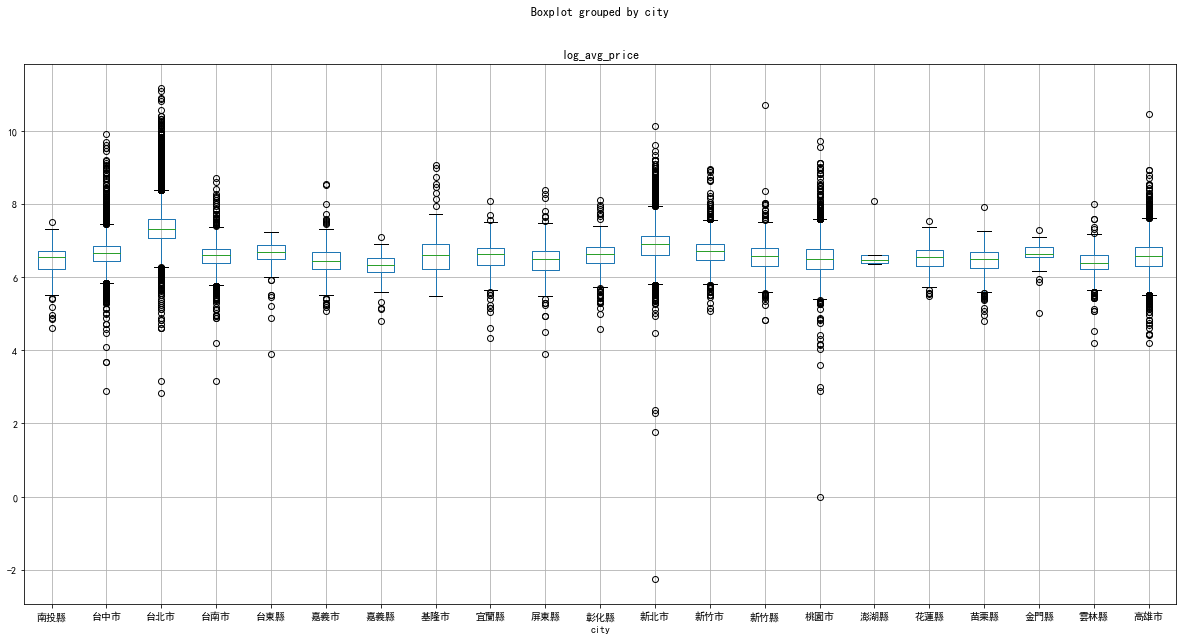

In [158]:
#coding:utf-8
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['axes.unicode_minus']=False
house['avg_price'] = house['price'] / house['building_area']
house = house[house['avg_price'] < 100000]
house['log_avg_price'] = np.log(house['avg_price'])
house.boxplot('log_avg_price', by= 'city', figsize = [20,10])

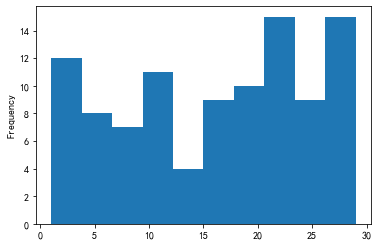

In [162]:
t[t < 50].plot(kind = 'hist', bins = 10)

In [163]:
t2 = t[t < 50]

In [167]:
#t2 - t2.mean()

In [168]:
t2.var()

75.3470707070707

In [169]:
t2.std()

8.68026904577679

In [170]:
t2.std() ** 2

75.3470707070707

In [173]:
tw2330['Close'].head()

Date
2000-01-04    69.649002
2000-01-05    71.214104
2000-01-06    69.649002
2000-01-07    67.692497
2000-01-10    70.040199
Name: Close, dtype: float64

In [177]:
(tw2330['Close'] / tw2330['Close'].shift(1) -1 ).head()

Date
2000-01-04         NaN
2000-01-05    0.022471
2000-01-06   -0.021977
2000-01-07   -0.028091
2000-01-10    0.034682
Name: Close, dtype: float64

In [179]:
tw2330['Close'].pct_change(1).head()

Date
2000-01-04         NaN
2000-01-05    0.022471
2000-01-06   -0.021977
2000-01-07   -0.028091
2000-01-10    0.034682
Name: Close, dtype: float64

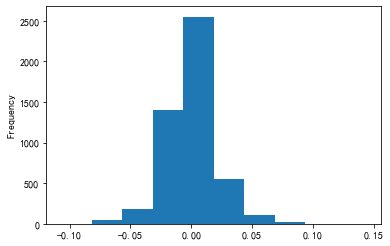

In [180]:
tw2330['Close'].pct_change(1).plot(kind = 'hist')

In [181]:
from pandas_datareader import DataReader
stock = DataReader(['2330.TW', '2454.TW', '2317.TW', '2498.TW', '2882.TW'], data_source = 'yahoo', start = '2000-01-01')['Close']

In [182]:
ret = stock.pct_change(1)

In [183]:
ret.head()

Symbols,2317.TW,2330.TW,2454.TW,2498.TW,2882.TW
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.029609,NaN,NaN,NaN,NaN
2000-01-05,0.000000,0.022471,NaN,NaN,-0.015475
2000-01-06,0.000000,-0.021977,NaN,NaN,0.015718
2000-01-07,-0.040325,-0.028091,NaN,NaN,-0.005127


In [184]:
ret.describe()

Symbols,2317.TW,2330.TW,2454.TW,2498.TW,2882.TW
count,4954.000000,4953.000000,4548.000000,4373.000000,4953.000000
mean,0.000987,0.000482,0.000699,0.000441,0.000108
std,0.036452,0.020018,0.025787,0.029644,0.020036
min,-0.394515,-0.106597,-0.157568,-0.144836,-0.113372
25%,-0.010370,-0.010417,-0.012884,-0.014998,-0.009361
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010451,0.010219,0.013453,0.015384,0.009045
max,0.488812,0.143669,0.186083,0.129214,0.101199
